# Objective 1: Problem Definition and Dataset Exploration

In [5]:
import pandas as pd
import os

# data_path = os.path.join(os.getcwd(), 'data', 'weather.csv')
data = pd.read_csv("weather.csv")

print("Dataset Information:")
print(data.info())

print("First 5 rows:")
print(data.head())

print(data.describe())

print("Missing Values:")
print(data.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       41544 non-null  object 
 1   location_name                 41544 non-null  object 
 2   latitude                      41544 non-null  float64
 3   longitude                     41544 non-null  float64
 4   timezone                      41544 non-null  object 
 5   last_updated_epoch            41544 non-null  int64  
 6   last_updated                  41544 non-null  object 
 7   temperature_celsius           41544 non-null  float64
 8   temperature_fahrenheit        41544 non-null  float64
 9   condition_text                41544 non-null  object 
 10  wind_mph                      41544 non-null  float64
 11  wind_kph                      41544 non-null  float64
 12  wind_degree                   41544 non

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

### Objective 2: Data Cleaning and Pre-processing

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os

# data_path = os.path.join(os.getcwd(), 'data', 'weather.csv')
data = pd.read_csv("Weather.csv")

# Handle missing values
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

non_numeric_columns = data.select_dtypes(include=['object']).columns
for col in non_numeric_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Encode categorical variables
for col in non_numeric_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Display cleaned data
print("Cleaned Data:")
print(data.head())

Cleaned Data:
   country  location_name  latitude  longitude  timezone  last_updated_epoch  \
0        0             98     34.52      69.18       104          1715849100   
1        1            225     41.33      19.82       166          1715849100   
2        2             11     36.76       3.05         2          1715849100   
3        3             14     42.50       1.52       133          1715849100   
4        4            122     -8.84      13.23        27          1715849100   

   last_updated  temperature_celsius  temperature_fahrenheit  condition_text  \
0          2615                 26.6                    79.8              27   
1          2608                 19.0                    66.2              28   
2          2661                 23.0                    73.4              38   
3          2608                  6.3                    43.3               9   
4          2661                 26.0                    78.8              28   

   ...  air_quality_PM2.

### Objective 3: Model Creation

### Model1.pkl file 

In [7]:
import pickle
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Load dataset
df = pd.read_csv("weather.csv")
X = df[['temperature_celsius', 'humidity', 'pressure_mb']]  # Only use these 3 features
y = df['wind_kph']  # Target variable

# Train model
model = RandomForestRegressor()
model.fit(X, y)

# Save model
with open("model1.pkl", "wb") as f:
    pickle.dump(model, f)


### Model.pkl file 

Missing values in target (y): 0
Missing values after encoding:
 0
Model training completed.
Accuracy: 0.9531832952220484
Classification Report:
               precision    recall  f1-score   support

        High       0.87      0.89      0.88      1381
         Low       1.00      0.99      0.99      3476
      Medium       0.95      0.99      0.97      3134
   Very High       0.90      0.50      0.64       318

    accuracy                           0.95      8309
   macro avg       0.93      0.84      0.87      8309
weighted avg       0.95      0.95      0.95      8309



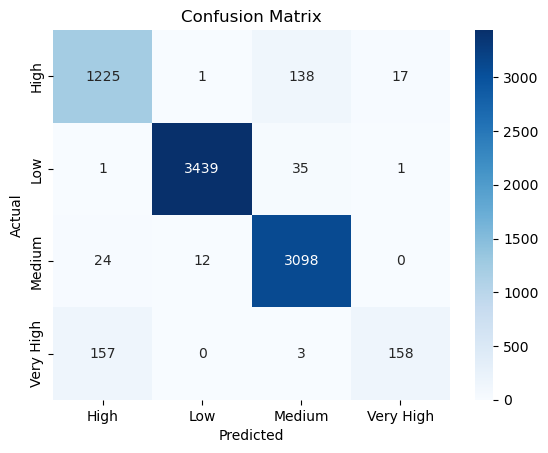

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os

# Load cleaned dataset
data = pd.read_csv('Weather.csv')

# Handle missing values for numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Handle missing values for non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
for col in non_numeric_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Ensure no missing values in wind_kph before binning
data['wind_kph'].fillna(data['wind_kph'].mean(), inplace=True)

# Adjust bins to cover all possible values
y = pd.cut(data['wind_kph'], bins=[-np.inf, 10, 20, 30, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])

# Double-check for NaNs after binning
print("Missing values in target (y):", y.isnull().sum())
y = y.fillna('Low')  # If any NaNs remain, assign them to 'Low'

# Define features
X = data.drop(['wind_kph'], axis=1)  # Features

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Verify no missing values after encoding
print("Missing values after encoding:\n", X.isnull().sum().sum())

# Double-check for any remaining NaNs and fill them with 0
X.fillna(0, inplace=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("Model training completed.")

# Predictions and Evaluation
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show(

# with open('model.pkl', 'wb') as model_file:
#     pickle.dump(model, model_file)
# print("Model saved successfully!")

### Multi Model Training 

In [1]:
import os
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Load dataset
df = pd.read_csv("weather.csv")

# Drop non-numeric and irrelevant columns
df = df.select_dtypes(include=[np.number]).dropna()

# Define features and target column
X = df.drop(columns=['wind_kph'])  # Adjust target column as needed
y = df['wind_kph']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

# Create directory for saving models
model_dir = "models"
os.makedirs(model_dir, exist_ok=True)

# Train and save models
for name, model in models.items():
    model.fit(X_train, y_train)
    model_path = os.path.join(model_dir, f"{name.replace(' ', '_')}.pkl")
    with open(model_path, 'wb') as model_file:
        pickle.dump(model, model_file)

print("All models trained and saved successfully in the 'models/' directory!")


✅ All models trained and saved successfully in the 'models/' directory!


In [2]:
import os
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Load dataset
df = pd.read_csv("weather.csv")

# Select only relevant features (temperature, humidity, pressure)
selected_features = ["temperature_celsius", "humidity", "pressure_mb"]
df = df[selected_features + ["wind_kph"]].dropna()

# Define features and target column
X = df[selected_features]
y = df["wind_kph"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize only selected features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

# Create directory for saving models
model_dir = "models"
os.makedirs(model_dir, exist_ok=True)

# Train and save models
for name, model in models.items():
    model.fit(X_train, y_train)
    model_path = os.path.join(model_dir, f"{name.replace(' ', '_')}.pkl")
    with open(model_path, 'wb') as model_file:
        pickle.dump(model, model_file)

# Save the scaler
scaler_path = os.path.join(model_dir, "scaler.pkl")
with open(scaler_path, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("✅ All models trained and saved successfully in the 'models/' directory!")

✅ All models trained and saved successfully in the 'models/' directory!


# Objective 4: Model Evaluation

Accuracy: 0.9531832952220484
Classification Report:
               precision    recall  f1-score   support

        High       0.87      0.89      0.88      1381
         Low       1.00      0.99      0.99      3476
      Medium       0.95      0.99      0.97      3134
   Very High       0.90      0.50      0.64       318

    accuracy                           0.95      8309
   macro avg       0.93      0.84      0.87      8309
weighted avg       0.95      0.95      0.95      8309



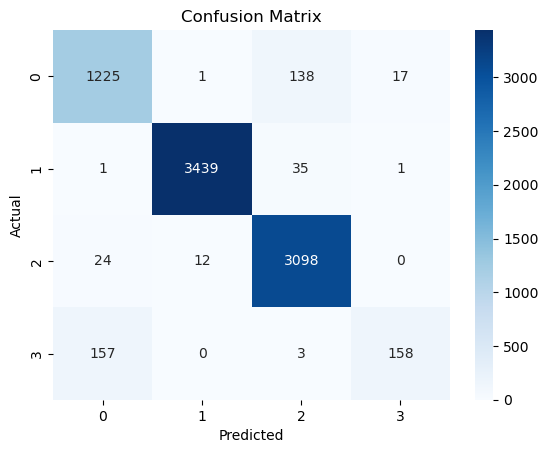

In [3]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions and Evaluation
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Objective 5: Advanced Model Training

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

# Retrain model with best parameters
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Best Score: 0.41666917406348725


LogisticRegression(C=0.1, random_state=42, solver='liblinear')

# Objective 6: Visualization of Metrics and Graphs

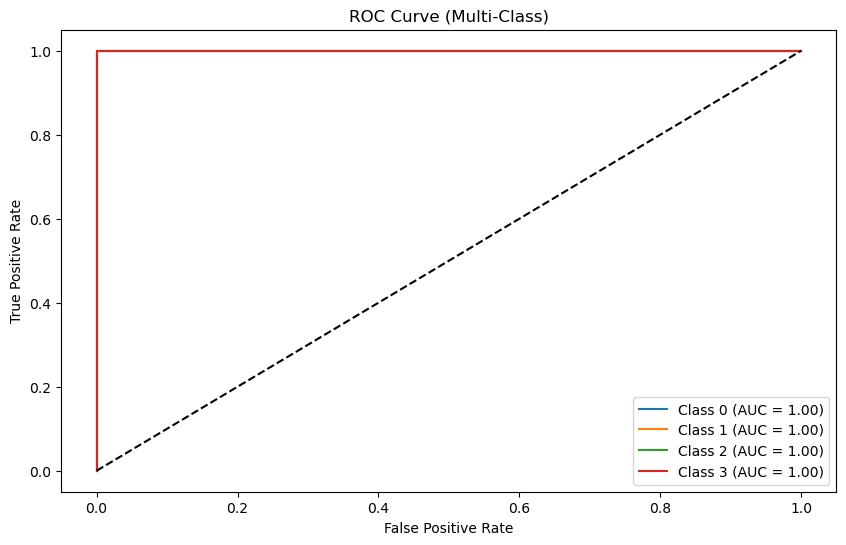

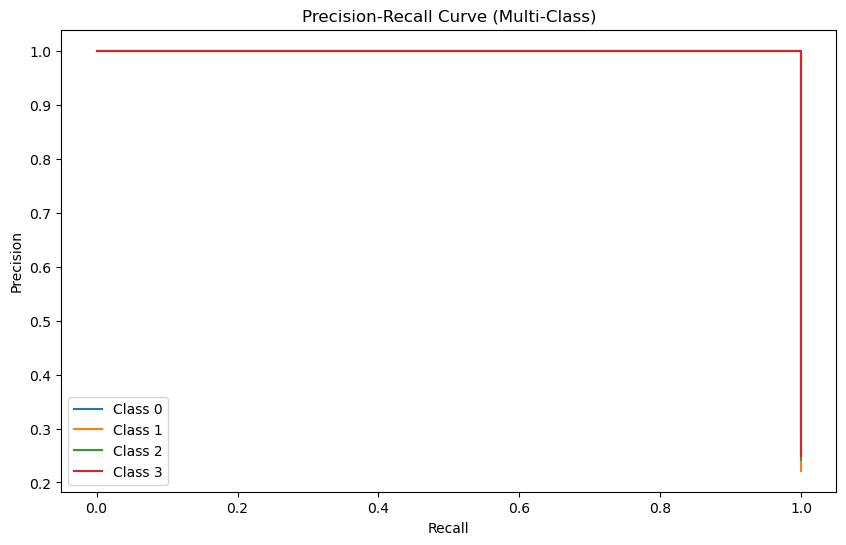

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Load dataset
df = pd.read_csv("weather.csv")

# Drop non-numeric and irrelevant columns
# Adjust this based on your dataset structure
df = df.select_dtypes(include=[np.number]).dropna()

# Define features and target column
X = df.drop(columns=['temperature_celsius','humidity', 'pressure_mb'])  # Adjust the target column as needed
y = df['wind_kph']

# Convert target variable into categorical bins (e.g., low, medium, high wind speed)
y = pd.qcut(y, q=4, labels=[0, 1, 2, 3])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)

# Binarize y_test for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test_bin.shape[1]

# Plot ROC Curve
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], best_model.predict_proba(X_test)[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class)")
plt.legend()
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], best_model.predict_proba(X_test)[:, i])
    plt.plot(recall, precision, label=f'Class {i}')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Multi-Class)")
plt.legend()
plt.show()